In [18]:
import csv
import os
import matplotlib.pyplot as plt
import numpy as np  
from sklearn import linear_model
import pandas as pd
import seaborn as sns

In [4]:
def loadData(fileName, inputVariabNames, outputVariabName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1

    calcInputs = []
    calcOutputs = []
    Hindex = dataNames.index("Happiness.Score")
    Windex = dataNames.index("Whisker.high")
    Eindex = dataNames.index("Economy..GDP.per.Capita.")
    for i in range(30):
        if data[i][Hindex] != '' and data[i][Eindex] != '' and data[i][Windex] != '':
            calcInputs.append([float(data[i][Hindex]), float(data[i][Windex])])
            calcOutputs.append(float(data[i][Eindex]))
    regressor = linear_model.LinearRegression()
    regressor.fit(calcInputs, calcOutputs)
    w0, w1, w2 = regressor.intercept_, regressor.coef_[0], regressor.coef_[1]

    inputs = []
    for i in range(len(data)):
        rowValues = []
        for feature in inputVariabNames:
            featureIndex = dataNames.index(feature)
            if data[i][featureIndex] == '':
                rez = w0 + float(data[i][Hindex]) * w1 + float(data[i][Windex]) * w2
                rowValues.append(rez)
            else:
                rowValues.append(float(data[i][featureIndex]))
        inputs.append(rowValues)

    selectedOutput = dataNames.index(outputVariabName)
    outputs = [float(data[i][selectedOutput]) for i in range(len(data))]

    return inputs, outputs


def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()

def mse(computed, real):
    error = 0.0
    for y1, y2 in zip(computed, real):
        error += (y1 - y2) ** 2
    error /= len(real)
    return error

In [5]:
class MyRegression:
    def __init__(self):
        self.intercept_ = 0.0
        self.coef_ = []

    def fit(self, X, Y):
        for el in X:
            el.insert(0, 1)
        Y = self.transpose([Y])
        rez1 = self.transpose(X)
        rez2 = self.multiply(rez1, X)
        rez3 = self.inverse(rez2)
        rez4 = self.multiply(rez3, rez1)
        rez5 = self.multiply(rez4, Y)
        self.intercept_ = rez5[0][0]
        for r in rez5[1:]:
            self.coef_.append(r[0])

    def predict(self, inputs):
        result = []
        for input in inputs:
            sum = self.intercept_
            for x, coef in zip(input, self.coef_):
                sum += x * coef
            result.append(sum)
        return result


    def transpose(self, matrix):
        transpose = []
        for j in range(len(matrix[0])):   # no columns
            line = []
            for i in range(len(matrix)):  # no rows
                line.append(matrix[i][j])
            transpose.append(line)
        return transpose

    def minor(self, matrix, i, j):
        result = []
        for x in range(len(matrix)):
            if x != i:
                line = []
                for y in range(len(matrix[0])):
                    if y != j:
                        line.append(matrix[x][y])
                result.append(line)
        return result

    def determinant(self, matrix):
        if len(matrix) == 1:
            return matrix[0][0]

        if len(matrix) == 2:
            return matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]

        det = 0.0
        for j in range(len(matrix)): # dezvoltam dupa prima linie
            det += matrix[0][j] * ((-1) ** j) * self.determinant(self.minor(matrix, 0, j))
        return det

    def inverse(self, matrix):
        if len(matrix) != len(matrix[0]):
            raise Exception("Different number of rows and columns!")

        detMatrix = self.determinant(matrix)
        if detMatrix == 0:
            raise Exception("Matrix is not invertible!")

        result = self.adj(matrix)
        for i in range(len(result)):
            for j in range(len(result)):
                result[i][j] /= detMatrix
        return result

    def adj(self, matrix):
        matrix = self.transpose(matrix)
        result = []
        for i in range(len(matrix)):
            line = []
            for j in range(len(matrix)):
                elem = ((-1) ** (i + j)) * self.determinant(self.minor(matrix, i, j))
                line.append(elem)
            result.append(line)
        return result

    def multiply(self, a, b):
        if len(a[0]) != len(b):
            raise Exception("Can not multiply these matrices!")

        result = []
        for i in range(len(a)):
            result.append([0 for _ in range(len(b[0]))])

        for i in range(len(a)):
            for j in range(len(b[0])):
                for k in range(len(b)):
                    result[i][j] += a[i][k] * b[k][j]
        return result

In [7]:
crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'data', 'v1_world-happiness-report-2017.csv')

In [8]:
inputs, outputs = loadData(filePath, ["Economy..GDP.per.Capita.", "Freedom"], "Happiness.Score")

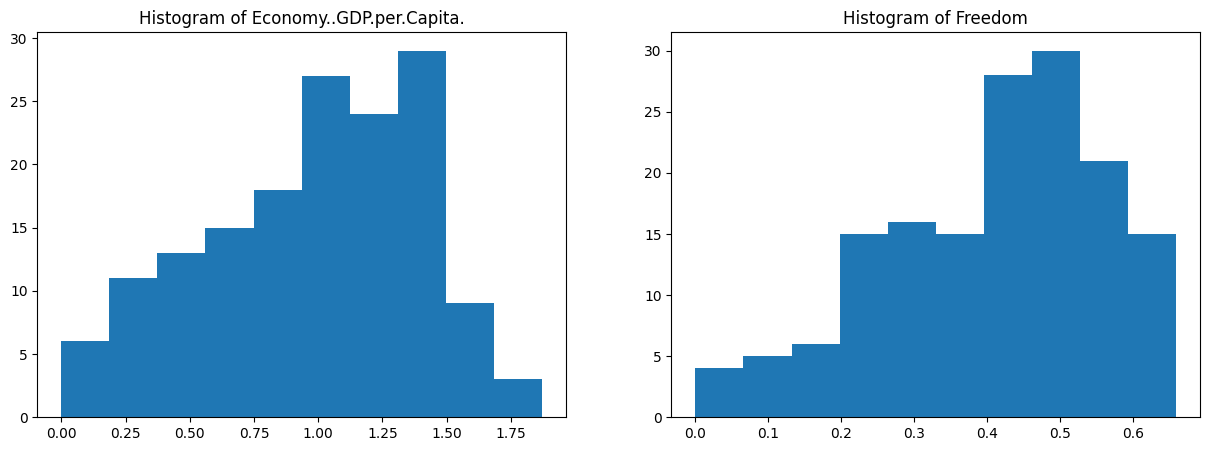

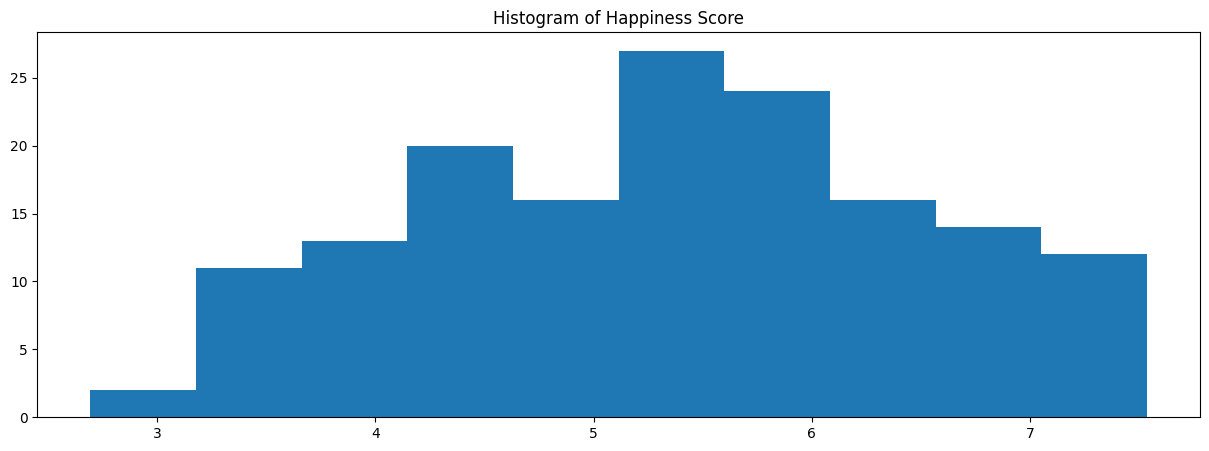

In [9]:
def plotDataHistogram(x, variableNames):
    fig, axs = plt.subplots(1, len(variableNames), figsize=(15, 5))
    if len(variableNames) == 1:
        axs.hist(x, bins=10)
        axs.set_title('Histogram of ' + variableNames[0])
    else:
        for i, var in enumerate(variableNames):
            axs[i].hist([row[i] for row in x], bins=10)
            axs[i].set_title('Histogram of ' + var)
    plt.show()

inputs, outputs = loadData(filePath, ['Economy..GDP.per.Capita.', 'Freedom'], 'Happiness.Score')

plotDataHistogram(inputs, ['Economy..GDP.per.Capita.', 'Freedom'])
plotDataHistogram(outputs, ['Happiness Score'])

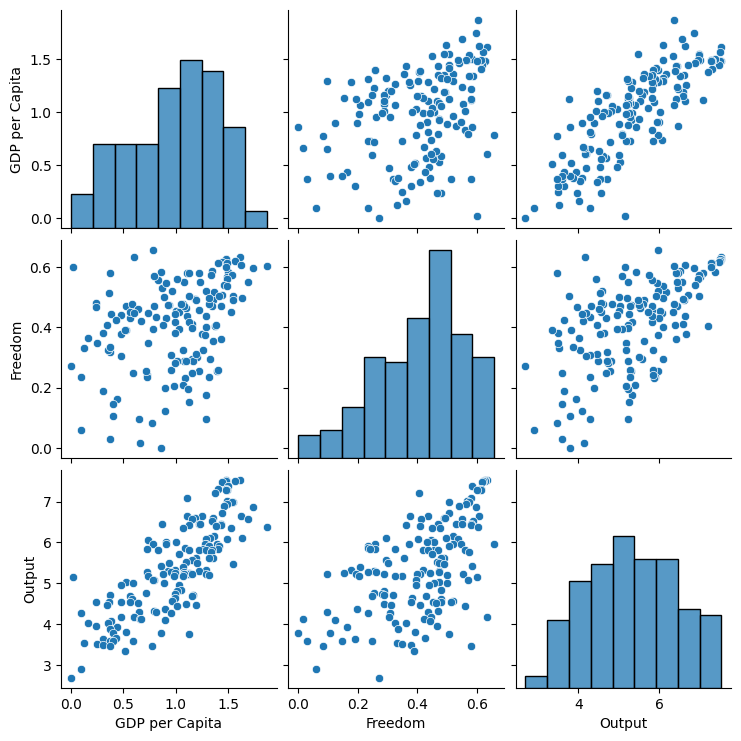

In [10]:
def plotScatterMatrix(inputs, output, variableNames):
    data = pd.DataFrame(inputs, columns=variableNames)
    data['Output'] = output
    sns.pairplot(data)
    plt.show()

inputs, outputs = loadData(filePath, ['Economy..GDP.per.Capita.', 'Freedom'], 'Happiness.Score')

plotScatterMatrix(inputs, outputs, ['GDP per Capita', 'Freedom'])

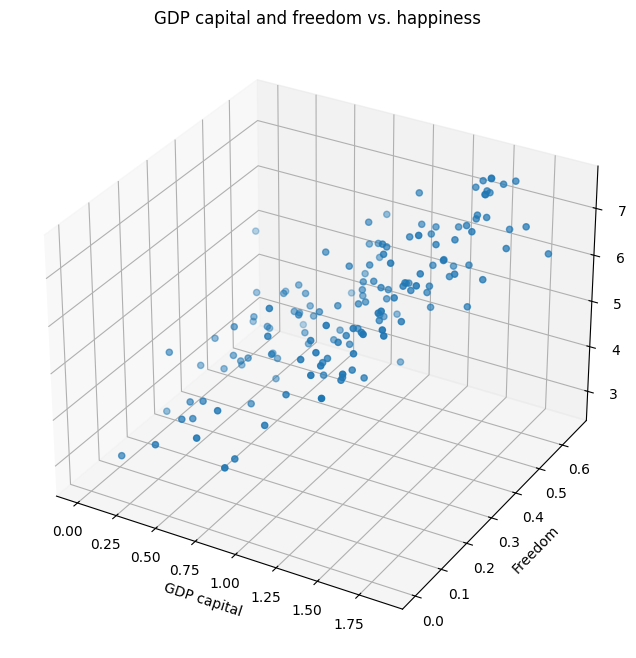

In [11]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter([x[0] for x in inputs], [x[1] for x in inputs], outputs)
ax.set_xlabel("GDP capital")
ax.set_ylabel("Freedom")
ax.set_zlabel("Happiness")
ax.set_title("GDP capital and freedom vs. happiness")
plt.show()

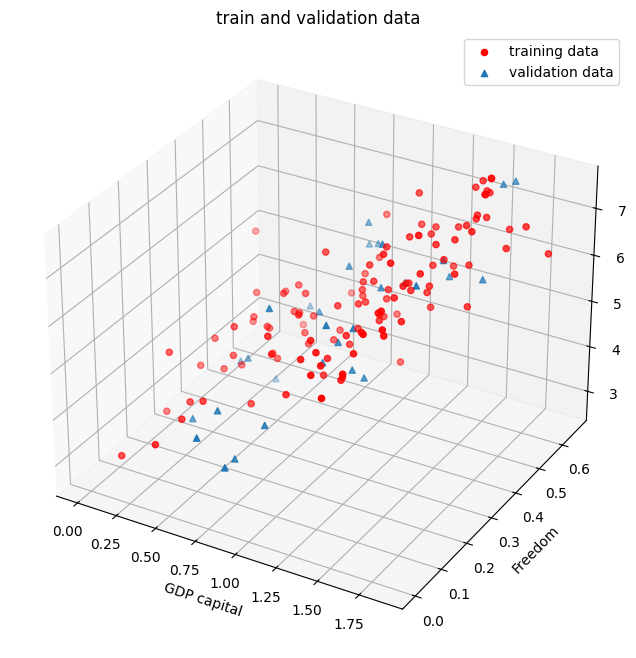

In [12]:
# Split the Data Into Training and Test Subsets(80/20%)
np.random.seed(4)  # aici trebuie modificat ca sa dea pt v2 mai bine(best 8)
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace=False)
validationSample = [i for i in indexes if i not in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]

validationInputs = [inputs[i] for i in validationSample]
validationOutputs = [outputs[i] for i in validationSample]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter([x[0] for x in trainInputs], [x[1] for x in trainInputs], trainOutputs, label='training data', marker='o',
        c='r')
ax.scatter([x[0] for x in validationInputs], [x[1] for x in validationInputs], validationOutputs,
       label='validation data', marker='^')
ax.set_xlabel("GDP capital")
ax.set_ylabel("Freedom")
ax.set_zlabel("Happiness")
ax.set_title("train and validation data")
ax.legend()
plt.show()

In [13]:
regressor = MyRegression()
regressor.fit(trainInputs, trainOutputs)
w0, w1, w2 = regressor.intercept_, regressor.coef_[0], regressor.coef_[1]
print('the learnt model: f(x1,x2) = ', w0, ' + ', w1, ' * x1 + ', w2, ' * x2')

the learnt model: f(x1,x2) =  2.6115525779761803  +  1.895530560851232  * x1 +  2.1131374258949704  * x2


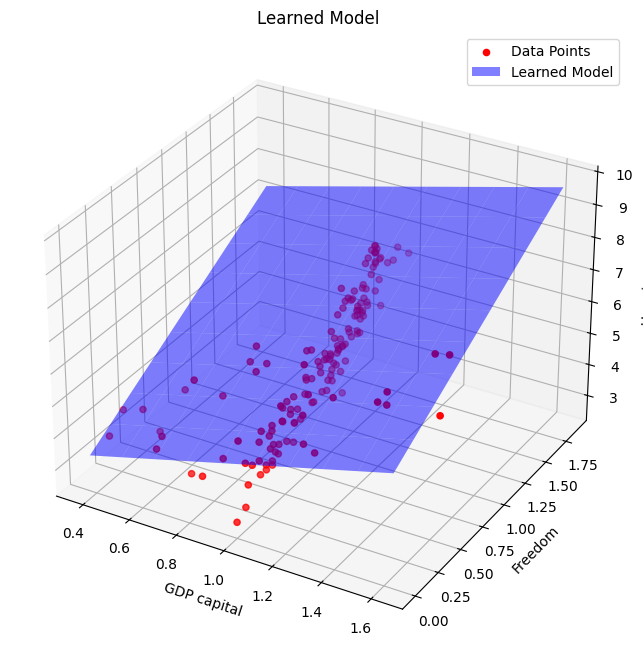

In [14]:
# Generate points for plotting the plane
x1_range = np.linspace(min([x[0] for x in inputs]), max([x[0] for x in inputs]), 10)
x2_range = np.linspace(min([x[1] for x in inputs]), max([x[1] for x in inputs]), 10)
x1_range, x2_range = np.meshgrid(x1_range, x2_range)
model_predictions = w0 + w1 * x1_range + w2 * x2_range

# Plot the data points
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter([x[0] for x in inputs], [x[1] for x in inputs], outputs, color='red', label='Data Points')

# Plot the learned model as a surface
ax.plot_surface(x1_range, x2_range, model_predictions, alpha=0.5, color='blue', label='Learned Model')

ax.set_xlabel('GDP capital')
ax.set_ylabel('Freedom')
ax.set_zlabel('Happiness')
ax.set_title('Learned Model')
ax.legend()

plt.show()


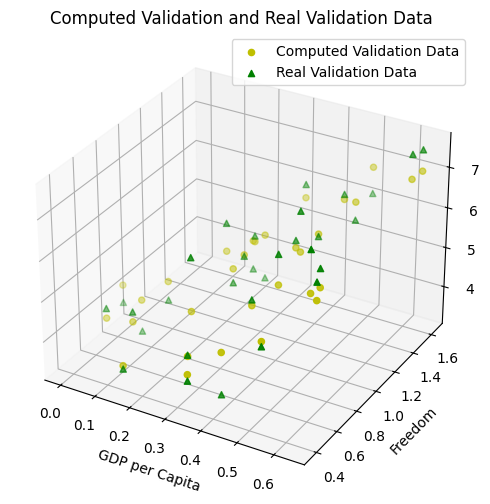

In [15]:
computedValidationOutputs = regressor.predict(validationInputs)
if 'sklearn' in str(type(regressor)):
    computedValidationOutputs = computedValidationOutputs.tolist()
# print('Computed validation output: ', computedValidationOutputs)

# Extract Freedom and GDP capital values for validation data
validation_Freedom = [x[1] for x in validationInputs]
validation_GDP = [x[0] for x in validationInputs]

# Plot the computed outputs against the real outputs
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(validation_Freedom, validation_GDP, computedValidationOutputs, c='y', marker='o', label='Computed Validation Data')  # Computed validation data
ax.scatter(validation_Freedom, validation_GDP, validationOutputs, c='g', marker='^', label='Real Validation Data')  # Real validation data
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Freedom')
ax.set_zlabel('Happiness Score')
plt.title('Computed Validation and Real Validation Data')
plt.legend()
plt.show()


In [16]:
# # use the trained model to predict new inputs
# computedValidationOutputs = regressor.predict(validationInputs)
# if 'sklearn' in str(type(regressor)):
#     computedValidationOutputs = computedValidationOutputs.tolist()
# # print('Computed validation output: ', computedValidationOutputs)
# fig = plt.figure(figsize=(8, 8))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter([x[0] for x in validationInputs], [x[1] for x in validationInputs], validationOutputs, label='real test data', marker='x',
#        c=[0 for _ in range(len(validationOutputs))])
# ax.scatter([x[0] for x in validationInputs], [x[1] for x in validationInputs], computedValidationOutputs,
#        label='computed test data', marker='^')
# ax.set_xlabel("GDP capital")
# ax.set_ylabel("Freedom")
# ax.set_zlabel("Happiness")
# ax.set_title("computed and real test data")
# ax.legend()
# plt.show()

In [17]:
 # mean square error
print('prediction error: ', mse(computedValidationOutputs, validationOutputs))

from sklearn.metrics import mean_squared_error
print('tool error: ', mean_squared_error(validationOutputs, computedValidationOutputs))
print('\n')

prediction error:  0.35427001466064584
tool error:  0.35427001466064584


